# Investigating Airplane Accidents

Accidents are an unfortunate fact of air travel. Although flying is statistically safer than driving, minor and major flying accidents occur daily.  There is data set of airplane accident statistics to analyze patterns and look for any common threads.

In [159]:
import pandas as pd
import numpy as np

In [160]:
# reading by rows
l = []
with open('AviationData.txt') as avia:
    for i in avia:
        l.append(i)
aviation_data = l
# the data
aviation_data[:2]

['Event Id | Investigation Type | Accident Number | Event Date | Location | Country | Latitude | Longitude | Airport Code | Airport Name | Injury Severity | Aircraft Damage | Aircraft Category | Registration Number | Make | Model | Amateur Built | Number of Engines | Engine Type | FAR Description | Schedule | Purpose of Flight | Air Carrier | Total Fatal Injuries | Total Serious Injuries | Total Minor Injuries | Total Uninjured | Weather Condition | Broad Phase of Flight | Report Status | Publication Date | \n',
 '20150908X74637 | Accident | CEN15LA402 | 09/08/2015 | Freeport, IL | United States | 42.246111 | -89.581945 | KFEP | albertus Airport | Non-Fatal | Substantial | Unknown | N24TL | CLARKE REGINALD W | DRAGONFLY MK |  |  |  | Part 91: General Aviation |  | Personal |  |  | 1 |  |  | VMC | TAKEOFF | Preliminary | 09/09/2015 | \n']

In [161]:
# create list of list using (|)
aviation_list=[]
for i in aviation_data:
    aviation_list.append(i.split(' | '))

finding row with LAX94LA336 accident O(n*m)

In [162]:
#The code below is very time consuming, 
#since we have to search through each row and column
lax_code = []
for i in aviation_list:
    for j in i:
        if j=='LAX94LA336': lax_code.append(i)

### Linear and Log Time Algorithm

In [163]:
# To make search linear O(n) the index of column could be added
lax_code = []
for i in aviation_list:
    if i[2]=='LAX94LA336': lax_code.append(i)

In [211]:
# read in DataFrame
a_l = pd.DataFrame(aviation_list[1:], columns = aviation_list[0])
# sorting
a_l_s = a_l.sort_values(by = 'Accident Number')
a_l_s.reset_index(inplace = True, drop=True)
a_l_s.head()

,Event Id,Investigation Type,Accident Number,Event Date,Location,Country,Latitude,Longitude,Airport Code,Airport Name,...,Air Carrier,Total Fatal Injuries,Total Serious Injuries,Total Minor Injuries,Total Uninjured,Weather Condition,Broad Phase of Flight,Report Status,Publication Date,\n
0,20001212X20184,Accident,ANC00FA018,12/07/1999,"BETHEL, AK",United States,,,,,...,"GRANT AVIATION, INC.",6,0,0,0,IMC,CRUISE,Probable Cause,04/18/2001,\n
1,20001212X20436,Accident,ANC00FA024,02/05/2000,"ILIAMNA, AK",United States,,,,,...,,6,0,0,0,UNK,CRUISE,Probable Cause,07/17/2001,\n
2,20001212X20930,Accident,ANC00FA052,05/01/2000,"KOTZEBUE, AK",United States,,,,,...,,1,0,0,0,IMC,CRUISE,Probable Cause,07/10/2001,\n
3,20001212X20931,Accident,ANC00FA056,05/09/2000,"ANCHORAGE, AK",United States,,,MRI,MERRILL FIELD,...,,0,0,0,2,VMC,DESCENT,Probable Cause,07/10/2001,\n
4,20001212X21133,Accident,ANC00FA076,06/22/2000,"TUNTUTULIAK, AK",United States,,,AK61,TUNTUTULIAK,...,,1,1,0,0,VMC,TAKEOFF,Probable Cause,07/10/2001,\n


In [212]:
# implimenting the binary search - log(n) algorithm
import math
x = 'LAX94LA336'
lower_bound = 0
upper_bound = len(a_l_s)-1
index = math.floor((lower_bound + upper_bound) / 2)
guess = a_l_s['Accident Number'][index]
while guess != x and upper_bound >= lower_bound:
    if x < guess:
        upper_bound = index - 1
    else:
        lower_bound = index + 1
    index = math.floor((lower_bound + upper_bound) / 2)
    guess = a_l_s['Accident Number'][index]
row = a_l_s.iloc[index,:]

In [213]:
row[2]

'LAX94LA336'

### Hash Tables

In [214]:
# store the data as a list of dictionaries
aviation_dict_list = []
columns = aviation_data[0].split(' | ')
for i in aviation_data:
    k = i.split(' | ')
    d = {}
    for j in range(0,len(k)):
        d[columns[j]] = k[j]
    aviation_dict_list.append(d)

In [215]:
# search in a hash table
lax_dict = {}
for i in aviation_dict_list:
    if i['Accident Number'] == 'LAX94LA336':
        lax_dict = i
lax_dict

{'Event Id': '20001218X45447',
 'Investigation Type': 'Accident',
 'Accident Number': 'LAX94LA336',
 'Event Date': '07/19/1962',
 'Location': 'BRIDGEPORT, CA',
 'Country': 'United States',
 'Latitude': '',
 'Longitude': '',
 'Airport Code': '',
 'Airport Name': '',
 'Injury Severity': 'Fatal(4)',
 'Aircraft Damage': 'Destroyed',
 'Aircraft Category': '',
 'Registration Number': 'N5069P',
 'Make': 'PIPER',
 'Model': 'PA24-180',
 'Amateur Built': 'No',
 'Number of Engines': '1',
 'Engine Type': 'Reciprocating',
 'FAR Description': '',
 'Schedule': '',
 'Purpose of Flight': 'Personal',
 'Air Carrier': '',
 'Total Fatal Injuries': '4',
 'Total Serious Injuries': '0',
 'Total Minor Injuries': '0',
 'Total Uninjured': '0',
 'Weather Condition': 'UNK',
 'Broad Phase of Flight': 'UNKNOWN',
 'Report Status': 'Probable Cause',
 'Publication Date': '09/19/1996',
 '\n': '\n'}

Search in a list of hash tables is linear O(n). but it is more memory consuming than a list of lists

### Accidents by U.S. State

count how many accidents occurred in each U.S. state, then determine which state had the most accidents overall.

The State could be found in Location column, but with a city. First will be created new column

In [216]:
# new column with state
a_l['state'] = a_l['Location'].str.split(', ').str[1]

In [217]:
a_l['state'].head()

0    IL
1    NH
2    SD
3    CA
4    NJ
Name: state, dtype: object

In [218]:
# frequency of accidents by state
a_l['state'].value_counts(ascending = False)[:10]

CA    8030
FL    5117
TX    5112
AK    5049
AZ    2502
CO    2460
WA    2354
IL    1874
MI    1863
GA    1747
Name: state, dtype: int64

In [219]:
#The State with the most frequent accidents
state_most_accidents = a_l['state'].value_counts(ascending = False).index[0]
state_most_accidents

'CA'

### Fatalities and Injuries by Month

count how many fatalities and serious injuries occurred during each month.

In [220]:
# blank values in columns Total Fatal Injuries and Total Fatal Injuries
# change to zero
print(a_l['Total Fatal Injuries'].value_counts()[:5])
a_l['Total Fatal Injuries'][a_l['Total Fatal Injuries'] == ''] = int(0) 
a_l['Total Serious Injuries'][a_l['Total Serious Injuries'] == ''] = int(0)
a_l['Total Serious Injuries'] = a_l['Total Serious Injuries'].astype('int')
a_l['Total Fatal Injuries'] = a_l['Total Fatal Injuries'].astype('int')
print(a_l['Total Fatal Injuries'].value_counts()[:5])

0    40358
     21489
1     7619
2     4497
3     1408
Name: Total Fatal Injuries, dtype: int64
0    61847
1     7619
2     4497
3     1408
4      977
Name: Total Fatal Injuries, dtype: int64


In [221]:
# create new column monthly_injuries
a_l['total_injuries'] = a_l['Total Serious Injuries'] + a_l['Total Fatal Injuries']
a_l.head()

,Event Id,Investigation Type,Accident Number,Event Date,Location,Country,Latitude,Longitude,Airport Code,Airport Name,...,Total Serious Injuries,Total Minor Injuries,Total Uninjured,Weather Condition,Broad Phase of Flight,Report Status,Publication Date,\n,state,total_injuries
0,20150908X74637,Accident,CEN15LA402,09/08/2015,"Freeport, IL",United States,42.246111,-89.581945,KFEP,albertus Airport,...,1,,,VMC,TAKEOFF,Preliminary,09/09/2015,\n,IL,1
1,20150906X32704,Accident,ERA15LA339,09/05/2015,"Laconia, NH",United States,43.606389,-71.452778,LCI,Laconia Municipal Airport,...,0,,,VMC,MANEUVERING,Preliminary,09/10/2015,\n,NH,1
2,20150908X00229,Accident,GAA15CA251,09/04/2015,"Hayes, SD",United States,,,,,...,0,,,,,Preliminary,,\n,SD,0
3,20150903X33216,Accident,WPR15FA256,09/03/2015,"Santee, CA",United States,32.829445,-116.988611,SEE,GILLESPIE FIELD,...,0,,,VMC,TAKEOFF,Preliminary,09/09/2015,\n,CA,2
4,20150903X34535,Accident,ERA15LA338,09/03/2015,"Cresskill, NJ",United States,40.935833,-73.958611,,N/A,...,2,,,VMC,,Preliminary,09/10/2015,\n,NJ,2


In [222]:
# drop rows without values in Event Date column 
indexes_to_drop = a_l['Event Date'][a_l['Event Date'] == '']
a_l_clean = a_l.drop(indexes_to_drop.index, axis = 0)
print( a_l_clean.shape, a_l.shape)

(77278, 34) (77281, 34)


In [223]:
# create new column with month
a_l_clean['Event Date'] = pd.to_datetime(a_l_clean['Event Date'],format = '%m/%d/%Y')
from datetime import datetime as dt
a_l_clean['Month'] = a_l_clean['Event Date'].dt.month

In [224]:
# display monthly injyries
monthly_injuries = a_l_clean.pivot_table(values = 'total_injuries', index = 'Month', aggfunc = np.sum)
monthly_injuries

,total_injuries
Month,
1,4224
2,3907
3,3797
4,4318
5,4955
6,5191
7,7003
8,6924
9,5529


Most injuries accure in July, August and September - the furlough months

### Map of accidents

In [229]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
%matplotlib inline

In [246]:
indexes = a_l['Latitude'][a_l['Latitude'] == ''].index
a_l = a_l.drop(indexes, axis = 0)
indexes = a_l['Longitude'][a_l['Longitude'] == ''].index
a_l = a_l.drop(indexes, axis = 0)

In [247]:
a_l['Latitude'] = a_l['Latitude'].astype('float')
a_l['Longitude'] = a_l['Longitude'].astype('float')

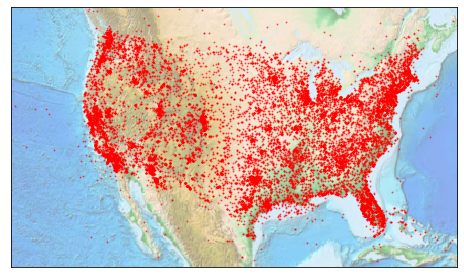

In [274]:
fig = plt.figure(figsize=(8, 8))
m = Basemap(projection='lcc', resolution=None,
            width=6E6, height=3.5E6, 
            lat_0=38, lon_0=-100,)
m.etopo(scale=0.5, alpha=0.5)

# Extract the data we're interested in
lat = a_l['Latitude'].tolist()
lon = a_l['Longitude'].tolist()

# scatter data, with color
# and size reflecting area
m.scatter(lon, lat, latlon=True, s = 1, alpha=0.5, color = 'red')